In [1]:
# import
import numpy
import matplotlib.pyplot

In [14]:
# variable
EPOCH = 10000
REMIDER = 500
LEARNING_RATE = 0.05

LINEAR_NUMBER = 100
XOR_NUMBER = 21
HIDDEN_LAYER = 2
HIDDEN_LAYER_NODE1 = 30
HIDDEN_LAYER_NODE2 = 20
WEIGHT1 = numpy.random.randn(HIDDEN_LAYER, HIDDEN_LAYER_NODE1)
WEIGHT2 = numpy.random.randn(HIDDEN_LAYER_NODE1, HIDDEN_LAYER_NODE2)
WEIGHT3 = numpy.random.randn(HIDDEN_LAYER_NODE2, HIDDEN_LAYER)
# WEIGHT1 = numpy.full((HIDDEN_LAYER, HIDDEN_LAYER_NODE1),
#                      1 / (HIDDEN_LAYER * HIDDEN_LAYER_NODE1))
# WEIGHT2 = numpy.full((HIDDEN_LAYER_NODE1, HIDDEN_LAYER_NODE2),
#                      1 / (HIDDEN_LAYER_NODE1 * HIDDEN_LAYER_NODE2))
# WEIGHT3 = numpy.full((HIDDEN_LAYER_NODE2, HIDDEN_LAYER),
#                      1 / (HIDDEN_LAYER_NODE2 * HIDDEN_LAYER))

In [3]:
# function
# create data
def generate_linear():
    pts = numpy.random.uniform(0, 1, (LINEAR_NUMBER, 2))
    inputs = []
    labels = []

    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)

    return numpy.array(inputs), numpy.array(labels).reshape(LINEAR_NUMBER, 1)


def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue

        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)

    return numpy.array(inputs), numpy.array(labels).reshape(XOR_NUMBER, 1)


# draw data
def show_result(x, y, pred_y):
    matplotlib.pyplot.subplot(1, 2, 1)
    matplotlib.pyplot.title('Ground Truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            matplotlib.pyplot.plot(x[i][0], x[i][1], 'ro')
        else:
            matplotlib.pyplot.plot(x[i][0], x[i][1], 'bo')

    matplotlib.pyplot.subplot(1, 2, 2)
    matplotlib.pyplot.title('Predict Result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            matplotlib.pyplot.plot(x[i][0], x[i][1], 'ro')
        else:
            matplotlib.pyplot.plot(x[i][0], x[i][1], 'bo')

    matplotlib.pyplot.show()
    matplotlib.pyplot.clf()


# sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + numpy.exp(-x))


def derivative_sigmoid(x):
    return numpy.multiply(x, 1.0 - x)

In [11]:
# create data ( data, label )
linear_x, linear_y = generate_linear()
XOR_x, XOR_y = generate_XOR_easy()

In [ ]:
# 簡易版本(手寫稿)
lr = 0.001
inputs = numpy.array([[0.3, 0.5]])
w1 = numpy.array([[1, 2, 3], [4, 5, 6]])
w2 = numpy.array([[1, 2], [3, 4], [5, 6]])
w3 = numpy.array([[1, 2], [3, 4]])
label = numpy.array([[1]])
labels = []

# forward
z1 = sigmoid(numpy.matmul(inputs, w1))
z2 = sigmoid(numpy.matmul(z1, w2))
z3 = sigmoid(numpy.matmul(z2, w3))
for i in range(len(label)):
    if label[i][0] == 1:
        labels.append([1, 0])
    else:
        labels.append([0, 1])

# backward
d3 = (z3 - labels) * derivative_sigmoid(z3)
d2 = numpy.matmul(d3, w3.T) * derivative_sigmoid(z2)
d1 = numpy.matmul(d2, w2.T) * derivative_sigmoid(z1)

# update weight
w1 = w1 - lr * numpy.matmul(inputs.T, d1)
w2 = w2 - lr * numpy.matmul(z1.T, d2)
w3 = w3 - lr * numpy.matmul(z2.T, d3)

[[0.98380609 0.01467062]]
[[0.0058951  0.99130785]]
[[0.64171507 0.34105975]]
[[0.99815756 0.00267645]]
[[0.99581891 0.00475183]]
[[0.99713468 0.00344025]]
[[0.99845667 0.00228648]]
[[0.5836849  0.31701155]]
[[0.97844884 0.0208955 ]]
[[0.99658383 0.00429136]]
[[0.14863531 0.85414305]]
[[0.96696013 0.03140464]]
[[0.99551029 0.00529799]]
[[0.85540352 0.14353273]]
[[0.97718706 0.01879272]]
[[0.99857145 0.0022561 ]]
[[0.01076403 0.98701242]]
[[0.97472226 0.02494261]]
[[0.99657546 0.00407964]]
[[0.99030101 0.00939439]]
[[0.6530253  0.33397351]]
[[0.74810904 0.24700573]]
[[0.97433795 0.02563853]]
[[0.99485993 0.00686653]]
[[0.88137102 0.11208814]]
[[0.90323009 0.09130432]]
[[0.99207687 0.0091011 ]]
[[0.06544333 0.93584856]]
[[0.43710988 0.46541356]]
[[0.42952351 0.57532678]]
[[0.9980933  0.00281574]]
[[0.99528332 0.00560827]]
[[0.895598   0.09811132]]
[[0.71271118 0.28642004]]
[[0.60280467 0.38893905]]
[[0.98950654 0.01107525]]
[[0.99459014 0.00611877]]
[[0.97833777 0.0194959 ]]
[[0.92977584

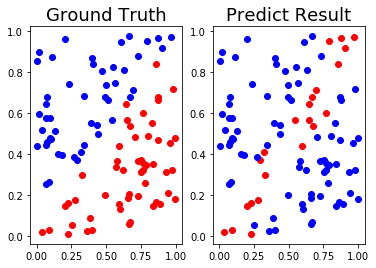

[[9.99827066e-01 2.37579590e-04]]
[[5.35346657e-04 9.99486032e-01]]
[[0.99909718 0.00103611]]
[[0.00788573 0.98732505]]
[[0.00206967 0.99644549]]
[[0.00436202 0.99137698]]
[[0.01010623 0.98486605]]
[[2.64597470e-04 9.99671663e-01]]
[[9.99914335e-01 1.41278195e-04]]
[[0.00430717 0.99111821]]
[[0.96908962 0.03345917]]
[[6.73941344e-04 9.99226950e-01]]
[[0.00295215 0.99381307]]
[[0.99911967 0.00103915]]
[[9.99752638e-01 3.17577739e-04]]
[[0.01328629 0.98276471]]
[[0.932045   0.06458935]]
[[9.99877264e-01 1.93199759e-04]]
[[0.00477106 0.9908966 ]]
[[9.99898182e-01 1.53684767e-04]]
[[0.99383512 0.00737717]]
[[0.00153069 0.99838097]]
[[9.99795328e-01 2.98042451e-04]]
[[0.00453472 0.99108023]]
[[8.84801944e-04 9.99021332e-01]]
[[0.00107559 0.99882984]]
[[0.00286288 0.99367218]]
[[0.01221001 0.98814336]]
[[0.9986282 0.0014291]]
[[0.98751807 0.01365475]]
[[0.00908271 0.98636629]]
[[0.00318627 0.99320783]]
[[8.47076421e-04 9.99070677e-01]]
[[0.99687    0.00347316]]
[[0.00128656 0.99862387]]
[[0.

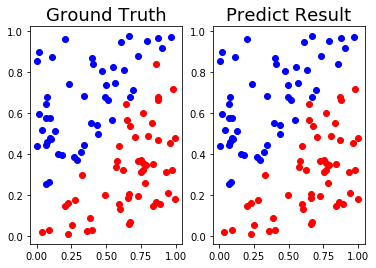

[[9.99949052e-01 7.37016782e-05]]
[[3.30865520e-04 9.99649439e-01]]
[[9.99705414e-01 3.44506526e-04]]
[[0.00256352 0.99551137]]
[[9.58791281e-04 9.97918679e-01]]
[[0.00168488 0.99607107]]
[[0.00325859 0.99467157]]
[[1.30113465e-04 9.99815031e-01]]
[[9.99972544e-01 4.53317604e-05]]
[[0.0014104  0.99676868]]
[[0.98922566 0.01079654]]
[[2.39383836e-04 9.99677135e-01]]
[[0.00104468 0.99745563]]
[[9.99702950e-01 3.47670822e-04]]
[[9.99930576e-01 9.53840448e-05]]
[[0.00420178 0.99389498]]
[[0.95947874 0.03968427]]
[[9.99960446e-01 6.20289186e-05]]
[[0.00233221 0.99472891]]
[[9.99970344e-01 4.70667311e-05]]
[[0.99808228 0.0021904 ]]
[[6.71876236e-04 9.99248862e-01]]
[[9.99932111e-01 9.80883832e-05]]
[[0.00156479 0.99669615]]
[[4.16582865e-04 9.99504940e-01]]
[[4.00410728e-04 9.99508609e-01]]
[[0.00099813 0.99752178]]
[[0.00471066 0.99516831]]
[[9.99561183e-01 4.83783807e-04]]
[[0.99572046 0.00438446]]
[[0.002937   0.99516012]]
[[0.00109324 0.99733983]]
[[2.93196824e-04 9.99629594e-01]]
[[0.99

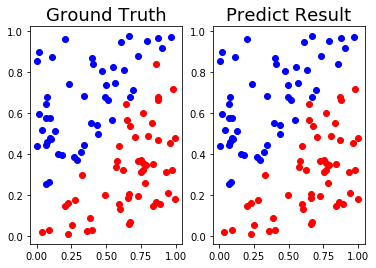

[[9.99983559e-01 2.61739630e-05]]
[[1.99031193e-04 9.99781552e-01]]
[[9.99887380e-01 1.38175093e-04]]
[[9.89152707e-04 9.98088489e-01]]
[[3.55081419e-04 9.99027641e-01]]
[[5.48952836e-04 9.98493813e-01]]
[[0.00118805 0.9978176 ]]
[[6.64902083e-05 9.99896874e-01]]
[[9.99988478e-01 1.93610030e-05]]
[[5.21470213e-04 9.98694066e-01]]
[[0.9956211  0.00423024]]
[[7.54567320e-05 9.99878583e-01]]
[[3.87452716e-04 9.98937122e-01]]
[[9.99871287e-01 1.52494577e-04]]
[[9.99980124e-01 3.11046195e-05]]
[[0.00153264 0.99742965]]
[[0.97645256 0.02416244]]
[[9.99982945e-01 2.71138349e-05]]
[[7.80582942e-04 9.97858335e-01]]
[[9.9999031e-01 1.6826244e-05]]
[[9.99173673e-01 9.45576232e-04]]
[[2.19092730e-04 9.99717535e-01]]
[[9.99969755e-01 4.42152889e-05]]
[[6.89133996e-04 9.98460022e-01]]
[[1.42006982e-04 9.99795222e-01]]
[[1.12415335e-04 9.99834367e-01]]
[[4.03233543e-04 9.98912527e-01]]
[[0.00151338 0.99830521]]
[[9.99858149e-01 1.75585226e-04]]
[[0.99819937 0.0017891 ]]
[[0.00113295 0.99791647]]
[[4.

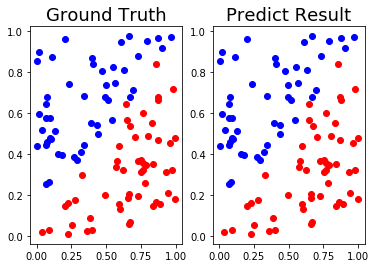

[[9.99994129e-01 1.05917662e-05]]
[[1.44553653e-04 9.99851926e-01]]
[[9.99950028e-01 6.59373311e-05]]
[[4.97292990e-04 9.99020557e-01]]
[[1.46874657e-04 9.99563249e-01]]
[[2.15051290e-04 9.99389742e-01]]
[[5.61185212e-04 9.98933730e-01]]
[[4.26629238e-05 9.99934585e-01]]
[[9.99994478e-01 1.00845919e-05]]
[[2.56201079e-04 9.99363246e-01]]
[[0.99806053 0.00200923]]
[[3.09830295e-05 9.99946605e-01]]
[[1.87284241e-04 9.99484077e-01]]
[[9.99933020e-01 8.42655327e-05]]
[[9.99993973e-01 1.10948015e-05]]
[[7.24503797e-04 9.98715546e-01]]
[[0.98638882 0.01463938]]
[[9.99991560e-01 1.46225612e-05]]
[[2.65672917e-04 9.99219227e-01]]
[[9.99996460e-01 6.94535353e-06]]
[[9.99612598e-01 4.93051396e-04]]
[[6.17201184e-05 9.99907029e-01]]
[[9.99984472e-01 2.47470070e-05]]
[[3.91797863e-04 9.99135042e-01]]
[[4.17497884e-05 9.99924912e-01]]
[[3.38212902e-05 9.99944247e-01]]
[[2.13913196e-04 9.99430310e-01]]
[[4.76075411e-04 9.99435342e-01]]
[[9.99954407e-01 6.53621949e-05]]
[[9.99129076e-01 9.23100245e-0

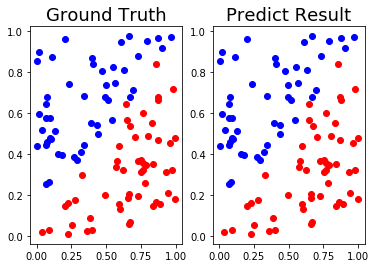

[[9.99997501e-01 4.91706032e-06]]
[[1.16695687e-04 9.99887294e-01]]
[[9.99973732e-01 3.69799207e-05]]
[[3.13603471e-04 9.99392518e-01]]
[[8.06111349e-05 9.99766713e-01]]
[[1.16078671e-04 9.99687963e-01]]
[[3.41504544e-04 9.99359509e-01]]
[[3.16090337e-05 9.99951940e-01]]
[[9.99997072e-01 5.92361180e-06]]
[[1.60439933e-04 9.99618170e-01]]
[[0.99907618 0.00106794]]
[[1.81693064e-05 9.99968700e-01]]
[[1.15536509e-04 9.99694537e-01]]
[[9.99960172e-01 5.45411086e-05]]
[[9.99997808e-01 4.47459231e-06]]
[[4.39113101e-04 9.99218574e-01]]
[[0.99187381 0.00880728]]
[[9.99995405e-01 8.89708337e-06]]
[[1.25932866e-04 9.99650684e-01]]
[[9.99998471e-01 3.27069607e-06]]
[[9.99808561e-01 2.73412793e-04]]
[[1.99164059e-05 9.99968536e-01]]
[[9.99991245e-01 1.56586168e-05]]
[[2.63025403e-04 9.99432851e-01]]
[[1.45503738e-05 9.99971264e-01]]
[[1.45278070e-05 9.99975964e-01]]
[[1.38730286e-04 9.99643711e-01]]
[[1.81544370e-04 9.99789594e-01]]
[[9.99983342e-01 2.60247040e-05]]
[[9.99541518e-01 5.40955211e-0

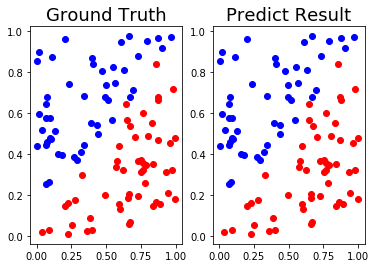

[[9.99998815e-01 2.41775809e-06]]
[[8.12777209e-05 9.99917827e-01]]
[[9.99985611e-01 2.10446884e-05]]
[[2.11800501e-04 9.99576743e-01]]
[[5.06166931e-05 9.99853344e-01]]
[[7.33710474e-05 9.99805796e-01]]
[[2.28434847e-04 9.99558506e-01]]
[[2.13140072e-05 9.99964848e-01]]
[[9.99998509e-01 3.20987194e-06]]
[[1.07044661e-04 9.99742140e-01]]
[[9.99509444e-01 5.87899749e-04]]
[[1.18868601e-05 9.99978444e-01]]
[[7.54262395e-05 9.99797878e-01]]
[[9.99976820e-01 3.34426078e-05]]
[[9.99999045e-01 2.01065139e-06]]
[[2.92100152e-04 9.99457835e-01]]
[[0.99505116 0.00529059]]
[[9.99997634e-01 4.91259060e-06]]
[[7.62441261e-05 9.99796298e-01]]
[[9.99999270e-01 1.61334675e-06]]
[[9.99896280e-01 1.52703393e-04]]
[[9.04602610e-06 9.99985423e-01]]
[[9.99995349e-01 8.94713538e-06]]
[[1.78964443e-04 9.99600475e-01]]
[[7.33771966e-06 9.99984788e-01]]
[[8.18362836e-06 9.99986061e-01]]
[[9.18913634e-05 9.99758194e-01]]
[[9.02992021e-05 9.99896361e-01]]
[[9.99992766e-01 1.15439471e-05]]
[[9.99745224e-01 3.134

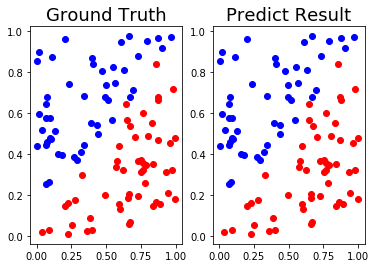

[[9.99999415e-01 1.23333285e-06]]
[[4.91934173e-05 9.99946446e-01]]
[[9.99992217e-01 1.17768468e-05]]
[[1.46058971e-04 9.99695491e-01]]
[[3.28213697e-05 9.99903673e-01]]
[[4.87382011e-05 9.99870959e-01]]
[[1.57597543e-04 9.99682615e-01]]
[[1.29506309e-05 9.99976380e-01]]
[[9.99999280e-01 1.62281468e-06]]
[[7.25010443e-05 9.99820551e-01]]
[[9.99711067e-01 3.49667178e-04]]
[[7.65149528e-06 9.99985124e-01]]
[[4.96146453e-05 9.99863203e-01]]
[[9.99987011e-01 1.94682540e-05]]
[[9.99999539e-01 9.93396551e-07]]
[[2.00477356e-04 9.99608561e-01]]
[[0.99698026 0.00320199]]
[[9.99998858e-01 2.49847090e-06]]
[[5.05417446e-05 9.99868128e-01]]
[[9.99999637e-01 8.25977552e-07]]
[[9.99938563e-01 9.13614758e-05]]
[[4.88562288e-06 9.99991900e-01]]
[[9.99997690e-01 4.69715222e-06]]
[[1.21740046e-04 9.99715442e-01]]
[[4.48425898e-06 9.99990239e-01]]
[[4.95380206e-06 9.99991157e-01]]
[[6.06442238e-05 9.99834203e-01]]
[[4.99670562e-05 9.99942095e-01]]
[[9.99996505e-01 5.68945878e-06]]
[[9.99849265e-01 1.886

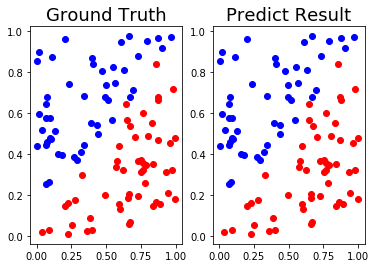

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [16]:
# Lab1
# switch: True = Linear; False = XOR
switch = True
if switch == True:
    input_x = linear_x
    input_y = linear_y
else:
    input_x = XOR_x
    input_y = XOR_y

# produce Y
groundTruth = []
for i in range(len(input_y)):
    if input_y[i][0] == 1:
        groundTruth.append([1, 0])
    else:
        groundTruth.append([0, 1])

# training data
for epoch in range(EPOCH):
    predict_y = []
    for i, inputX in enumerate(input_x):
        inputX = numpy.array([inputX])
        # forward: output = activation function( input * weight )
        z1 = sigmoid(numpy.matmul(inputX, WEIGHT1))
        z2 = sigmoid(numpy.matmul(z1, WEIGHT2))
        z3 = sigmoid(numpy.matmul(z2, WEIGHT3))

        if (z3[0][0] > z3[0][1]):
            predict_y.append(1)
        else:
            predict_y.append(0)
        
        if(epoch%REMIDER==0):
            print(z3)

        # backward
        # loss( delta )
        # 1. output layer = ( pre_y - y ) * derivative( output )
        # 2. hidden layer = weight' * delta' * derivative( output )
        DELTA3 = (z3 - groundTruth[i]) * derivative_sigmoid(z3)
        DELTA2 = (numpy.matmul(DELTA3, WEIGHT3.T)) * derivative_sigmoid(z2)
        DELTA1 = (numpy.matmul(DELTA2, WEIGHT2.T)) * derivative_sigmoid(z1)

        # uptate weight = weight - learning_rate * delta * input
        WEIGHT3 = WEIGHT3 - LEARNING_RATE * numpy.matmul(z2.T, DELTA3)
        WEIGHT2 = WEIGHT2 - LEARNING_RATE * numpy.matmul(z1.T, DELTA2)
        WEIGHT1 = WEIGHT1 - LEARNING_RATE * numpy.matmul(inputX.T, DELTA1)

        # results
        loss = numpy.sum(abs(z3 - groundTruth[i]))

    if (epoch % REMIDER == 0):
        print('Epoch', epoch, 'Loss', loss)
        show_result(input_x, input_y, predict_y)

[[0.01849954 0.04586051]]
[[0.04676273 0.0569548 ]]
[[0.02202692 0.04521051]]
[[0.0473233  0.05379946]]
[[0.02634953 0.0447521 ]]
[[0.04732947 0.05096221]]
[[0.03143622 0.04438838]]
[[0.04667173 0.04851895]]
[[0.03716263 0.04409941]]
[[0.04529752 0.04648149]]
[[0.04333045 0.0439255 ]]
[[0.04866562 0.04400508]]
[[0.03983023 0.04349528]]
[[0.05486097 0.04421846]]
[[0.03705932 0.04230153]]
[[0.06081067 0.04466274]]
[[0.0343248  0.04124603]]
[[0.06635251 0.04533741]]
[[0.03185516 0.04030347]]
[[0.07138159 0.04623174]]
[[0.02978198 0.03947806]]
Epoch 0 Loss 1.0096960789171427


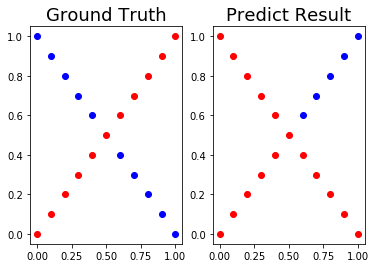

[[0.06625543 0.92520798]]
[[0.89827695 0.07684997]]
[[0.115142   0.88611492]]
[[0.8816849  0.09296278]]
[[0.2079208  0.80889526]]
[[0.82828092 0.14378402]]
[[0.31187967 0.71897489]]
[[0.67878926 0.29972501]]
[[0.37546672 0.66184514]]
[[0.45820761 0.55570016]]
[[0.39282425 0.6441113 ]]
[[0.33607145 0.69029358]]
[[0.43698923 0.57423039]]
[[0.2910222  0.72548441]]
[[0.64603724 0.31358355]]
[[0.23197534 0.77407319]]
[[0.80217832 0.14765714]]
[[0.17580266 0.82124913]]
[[0.87740801 0.08345373]]
[[0.13225883 0.85860533]]
[[0.91340046 0.05737481]]
Epoch 500 Loss 0.14397435301134165


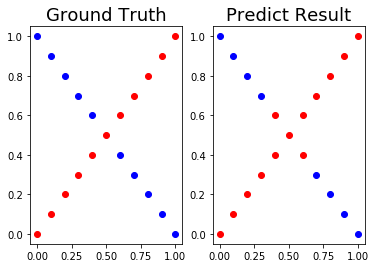

[[0.01893034 0.97484987]]
[[0.95890228 0.03543615]]
[[0.03295199 0.96194132]]
[[0.95938757 0.03536207]]
[[0.07584107 0.92289924]]
[[0.95457098 0.03983399]]
[[0.16263375 0.8463627 ]]
[[0.92467523 0.06709458]]
[[0.23763974 0.78094004]]
[[0.63870626 0.35526204]]
[[0.26426435 0.7578171 ]]
[[0.21219037 0.80177512]]
[[0.59316266 0.3696284 ]]
[[0.16441695 0.84200744]]
[[0.91805421 0.06274601]]
[[0.10745208 0.89090043]]
[[0.96785079 0.02616884]]
[[0.06831384 0.92574714]]
[[0.98031977 0.01792623]]
[[0.04388117 0.94868743]]
[[0.98496604 0.01555712]]
Epoch 1000 Loss 0.030591074617555412


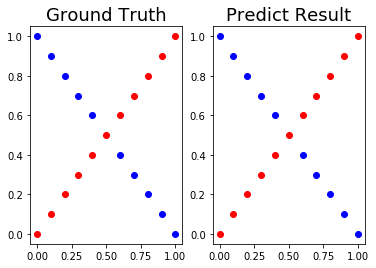

[[0.00899335 0.98788268]]
[[0.97382996 0.02350642]]
[[0.01546432 0.98181517]]
[[0.97510671 0.02247311]]
[[0.03766594 0.9614007 ]]
[[0.97385519 0.02359842]]
[[0.09210078 0.91367043]]
[[0.96465073 0.03187581]]
[[0.15081044 0.86337701]]
[[0.78729901 0.20307896]]
[[0.16790147 0.84891783]]
[[0.13420773 0.87669428]]
[[0.76325077 0.21071378]]
[[0.09566177 0.90888374]]
[[0.97332605 0.02375751]]
[[0.05956523 0.93962131]]
[[0.98885248 0.01145071]]
[[0.03609212 0.96056864]]
[[0.99244886 0.00905995]]
[[0.02213682 0.97379745]]
[[0.99381199 0.00861995]]
Epoch 1500 Loss 0.014807967593748151


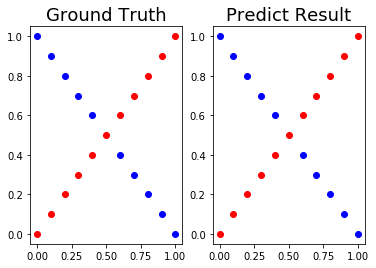

[[0.0057215  0.99219358]]
[[0.98070776 0.01806337]]
[[0.0097878 0.988312 ]]
[[0.98185931 0.01701193]]
[[0.02432271 0.97476853]]
[[0.98115935 0.01758004]]
[[0.06243189 0.94113593]]
[[0.97603574 0.02218859]]
[[0.10704505 0.90289449]]
[[0.85230894 0.14011394]]
[[0.11913172 0.892548  ]]
[[0.09504029 0.91225614]]
[[0.83843018 0.14567647]]
[[0.06528891 0.9370753 ]]
[[0.98545864 0.01429688]]
[[0.03994003 0.95885481]]
[[0.9935753  0.00742282]]
[[0.02378222 0.97348854]]
[[0.99545522 0.00620361]]
[[0.0143525 0.9826013]]
[[0.99618037 0.0060749 ]]
Epoch 2000 Loss 0.009894533452115179


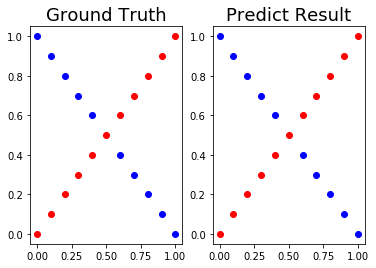

[[0.00426263 0.99412127]]
[[0.9844307  0.01505454]]
[[0.0072716  0.99120427]]
[[0.98542588 0.01407809]]
[[0.01825439 0.98084306]]
[[0.98488943 0.01447098]]
[[0.04798471 0.95437653]]
[[0.98120858 0.01777855]]
[[0.08412112 0.92323042]]
[[0.88497314 0.1093107 ]]
[[0.09362387 0.91498252]]
[[0.07450842 0.930627  ]]
[[0.87550384 0.11371352]]
[[0.05027776 0.95093826]]
[[0.98994039 0.01042959]]
[[0.0304744  0.96813577]]
[[0.99538268 0.00565757]]
[[0.01798897 0.97960255]]
[[0.99665682 0.0048621 ]]
[[0.01077166 0.98669293]]
[[0.99715358 0.00482601]]
Epoch 2500 Loss 0.007672429910435963


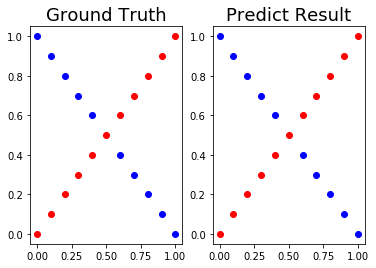

[[0.00345045 0.99520127]]
[[0.98674885 0.01312552]]
[[0.00587516 0.99282172]]
[[0.98762174 0.01222474]]
[[0.0148421  0.98427714]]
[[0.98715774 0.01253931]]
[[0.03957831 0.96208767]]
[[0.98418764 0.01520246]]
[[0.07028845 0.93546717]]
[[0.90434727 0.09120498]]
[[0.0782355  0.92849113]]
[[0.06212155 0.94171254]]
[[0.89720938 0.09484769]]
[[0.04148553 0.95910687]]
[[0.99219168 0.00835316]]
[[0.02499992 0.97355424]]
[[0.99631549 0.00466893]]
[[0.01467954 0.9831389 ]]
[[0.99729213 0.00408292]]
[[0.00874891 0.98903941]]
[[0.99767539 0.00408558]]
Epoch 3000 Loss 0.0064101971110197544


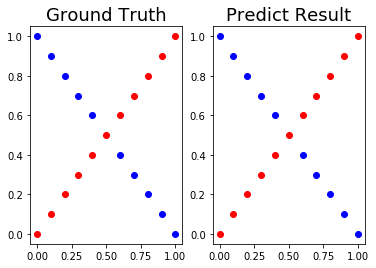

[[0.00293251 0.99589459]]
[[0.98833956 0.01176627]]
[[0.00498637 0.99385921]]
[[0.9891191  0.01093056]]
[[0.01265221 0.98649555]]
[[0.98869597 0.01120226]]
[[0.03406961 0.96716097]]
[[0.98614778 0.01348145]]
[[0.06102506 0.94367719]]
[[0.91720175 0.07922003]]
[[0.06792868 0.93756246]]
[[0.05383238 0.9491622 ]]
[[0.91148316 0.08232589]]
[[0.0357039 0.9645211]]
[[0.99353683 0.00705499]]
[[0.02142856 0.97712524]]
[[0.99688479 0.00403256]]
[[0.0125368  0.98545647]]
[[0.99768607 0.00356973]]
[[0.00744807 0.99056942]]
[[0.99800179 0.00359201]]
Epoch 3500 Loss 0.005590221063279474


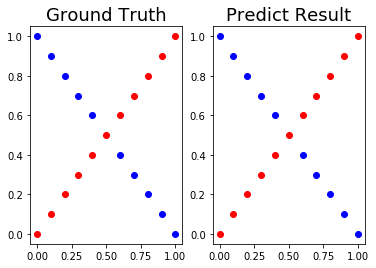

[[0.00257194 0.99638022]]
[[0.98950654 0.0107463 ]]
[[0.00436848 0.99458562]]
[[0.99021331 0.00996537]]
[[0.01112079 0.98805687]]
[[0.98981705 0.01021036]]
[[0.03016178 0.97077693]]
[[0.98754979 0.01223338]]
[[0.05435755 0.94960628]]
[[0.92640002 0.0706409 ]]
[[0.06050837 0.94411885]]
[[0.04787153 0.95454702]]
[[0.92163118 0.07334726]]
[[0.03159414 0.96839946]]
[[0.99443185 0.00616263]]
[[0.01890403 0.9796731 ]]
[[0.99727017 0.00358541]]
[[0.01102995 0.98710371]]
[[0.99795582 0.00320328]]
[[0.00653746 0.99165317]]
[[0.99822666 0.00323671]]
Epoch 4000 Loss 0.005010045093532818


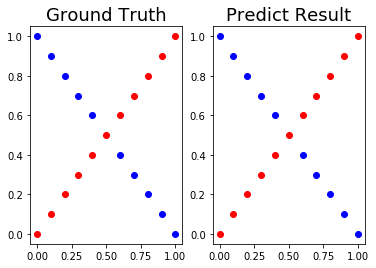

[[0.00230531 0.9967413 ]]
[[0.99040458 0.00994625]]
[[0.00391201 0.99512565]]
[[0.99105312 0.00921163]]
[[0.0099844  0.98922227]]
[[0.99067638 0.00943844]]
[[0.02723118 0.97350134]]
[[0.98861105 0.01127717]]
[[0.04930476 0.9541162 ]]
[[0.93334241 0.06415616]]
[[0.05488376 0.94910933]]
[[0.04335854 0.95864488]]
[[0.92925252 0.06655333]]
[[0.02850828 0.97133203]]
[[0.99507196 0.0055086 ]]
[[0.01701638 0.98159388]]
[[0.99754977 0.00325191]]
[[0.00990752 0.98834203]]
[[0.99815327 0.00292663]]
[[0.00586144 0.99246584]]
[[0.99839203 0.00296689]]
Epoch 4500 Loss 0.004574861990557918


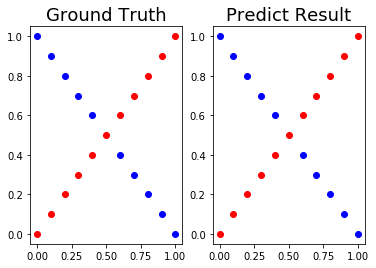

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [15]:
# Lab1
# switch: True = Linear; False = XOR
switch = False
if switch == True:
    input_x = linear_x
    input_y = linear_y
else:
    input_x = XOR_x
    input_y = XOR_y

# produce Y
groundTruth = []
for i in range(len(input_y)):
    if input_y[i][0] == 1:
        groundTruth.append([1, 0])
    else:
        groundTruth.append([0, 1])

# training data
for epoch in range(EPOCH):
    predict_y = []
    for i, inputX in enumerate(input_x):
        inputX = numpy.array([inputX])
        # forward: output = activation function( input * weight )
        z1 = sigmoid(numpy.matmul(inputX, WEIGHT1))
        z2 = sigmoid(numpy.matmul(z1, WEIGHT2))
        z3 = sigmoid(numpy.matmul(z2, WEIGHT3))

        if (z3[0][0] > z3[0][1]):
            predict_y.append(1)
        else:
            predict_y.append(0)
        
        if(epoch%REMIDER==0):
            print(z3)

        # backward
        # loss( delta )
        # 1. output layer = ( pre_y - y ) * derivative( output )
        # 2. hidden layer = weight' * delta' * derivative( output )
        DELTA3 = (z3 - groundTruth[i]) * derivative_sigmoid(z3)
        DELTA2 = (numpy.matmul(DELTA3, WEIGHT3.T)) * derivative_sigmoid(z2)
        DELTA1 = (numpy.matmul(DELTA2, WEIGHT2.T)) * derivative_sigmoid(z1)

        # uptate weight = weight - learning_rate * delta * input
        WEIGHT3 = WEIGHT3 - LEARNING_RATE * numpy.matmul(z2.T, DELTA3)
        WEIGHT2 = WEIGHT2 - LEARNING_RATE * numpy.matmul(z1.T, DELTA2)
        WEIGHT1 = WEIGHT1 - LEARNING_RATE * numpy.matmul(inputX.T, DELTA1)

        # results
        loss = numpy.sum(abs(z3 - groundTruth[i]))

    if (epoch % REMIDER == 0):
        print('Epoch', epoch, 'Loss', loss)
        show_result(input_x, input_y, predict_y)